In [1]:
import cv2 
import matplotlib.pyplot as plt

In [3]:
img_path = './sample/pattern_003.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [57]:
# 소벨 연산자 적용
ksize = 5
grad_x = cv2.Sobel(gray,cv2.CV_32F,1,0,ksize=ksize)
grad_y = cv2.Sobel(gray,cv2.CV_32F,0,1,ksize=ksize)
print(grad_x)
print(type(grad_x))

[[   0.  -70.  -68. ... -294. -120.    0.]
 [   0. -104.  -76. ... -276. -107.    0.]
 [   0. -181. -102. ... -232.  -80.    0.]
 ...
 [   0. -209. -216. ...  176.  176.    0.]
 [   0. -232. -243. ...  158.  147.    0.]
 [   0. -238. -252. ...  108.   90.    0.]]
<class 'numpy.ndarray'>


In [58]:
gray.shape

(4032, 3024)

In [59]:
grad_x.shape

(4032, 3024)

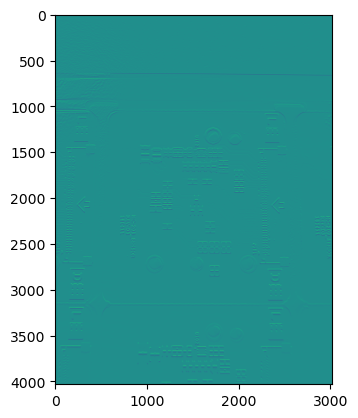

In [60]:
plt.imshow(grad_y)

In [61]:
sobel_x = cv2.convertScaleAbs(grad_x)
sobel_y = cv2.convertScaleAbs(grad_y)

In [62]:
edge_strength = cv2.addWeighted(sobel_x,0.3,sobel_y,0.3,0)
print(edge_strength)

[[  0  21  20 ...  76  36   0]
 [ 32  53  32 ...  96  43   7]
 [  7  61  55 ... 106  49  20]
 ...
 [ 38  95  87 ...  80  98  54]
 [ 10  82  89 ...  76  48  21]
 [  0  71  76 ...  32  27   0]]


In [63]:
edge_strength.shape

(4032, 3024)

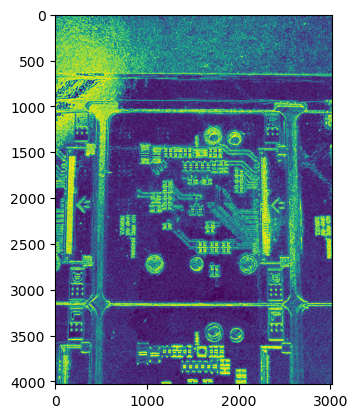

In [64]:
plt.imshow(sobel_y)

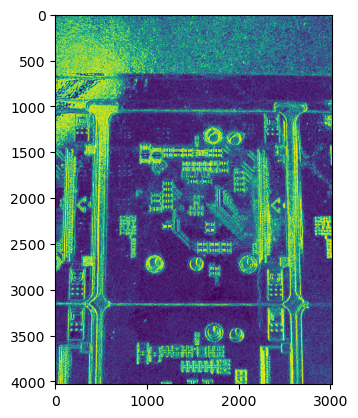

In [65]:
plt.imshow(sobel_x)


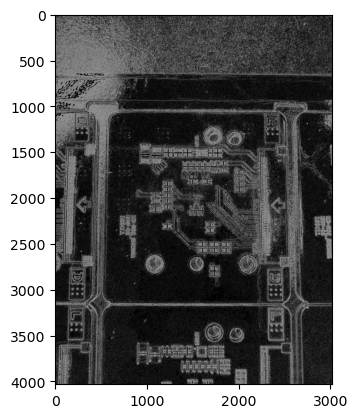

In [66]:
edge_img = cv2.cvtColor(edge_strength,cv2.COLOR_BGR2RGB)
plt.imshow(edge_img)

In [67]:

cv2.imwrite('edge_test.jpg',edge_img)

True

### 정리

소벨 에지 검출에서 ksize는 홀수로 넣어야 하며, 높일 수록 미세한 엣지도 검출 가능 (but 너무 높으면 엣지가 선명하게 나눠지지 않음)

weight가 높아지면 밝기가 밝아져. 적정한 값으로 수정하는 것이 좋아보임.